In [1]:
#toolz
import pandas as pd
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
#stylin'
plt.style.use('seaborn-darkgrid')

## Calculating d13C for a range of pH using Zebee equations

## NOTE: this is ocean pH

In [2]:
T=25    #degree C
TK = T + 273.15  #degree K
S=35    #PSS
DIC=2100 #micromol/kg
K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))
    
pH = np.arange(4,11,.1)
H=10**(-pH)  

HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
CO2aq=-9
CO3=-2
HCO3=0
d13C_DIC = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3

pH vs d13C

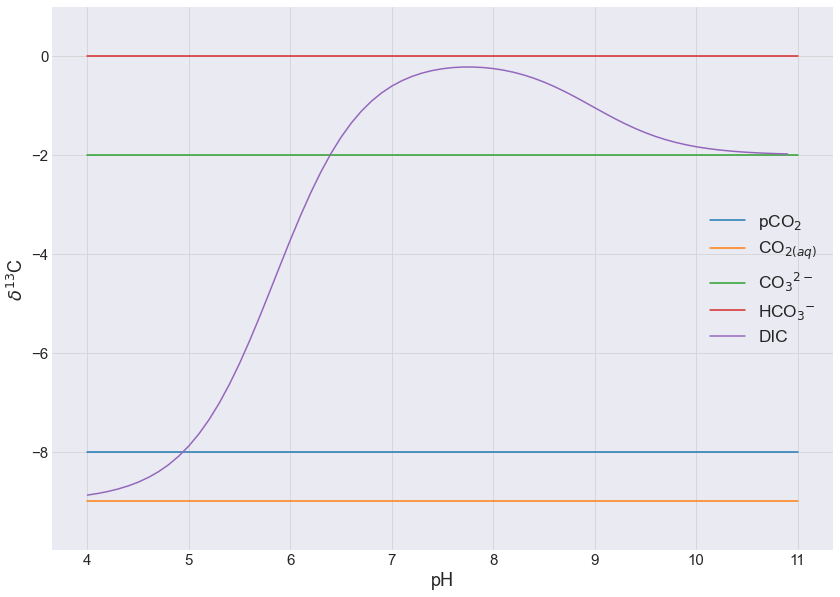

In [3]:
#basic plot 

pCO2=(-8,-8)
CO2aq=(-9,-9)
CO3=(-2,-2)
HCO3=(0,0)
ph=(4,11)

plt.figure(figsize=(14,10))
plt.plot(ph,pCO2,label='pCO$_{2}$')
plt.plot(ph,CO2aq, label='CO$_{2(aq)}$')
plt.plot(ph,CO3, label='CO$_{3}$$^{2-}$')
plt.plot(ph,HCO3, label='HCO$_{3}$$^{-}$')
plt.plot(pH,d13C_DIC, label='DIC')
plt.xlabel('pH',fontsize=18)
plt.ylabel('$\delta^{13}$C',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='lightgrey')
plt.ylim(-9.99,1)
plt.legend(loc='best',fontsize='xx-large',frameon=False)

Carbonate system Bjerrum plot: (adapted from Zebee)

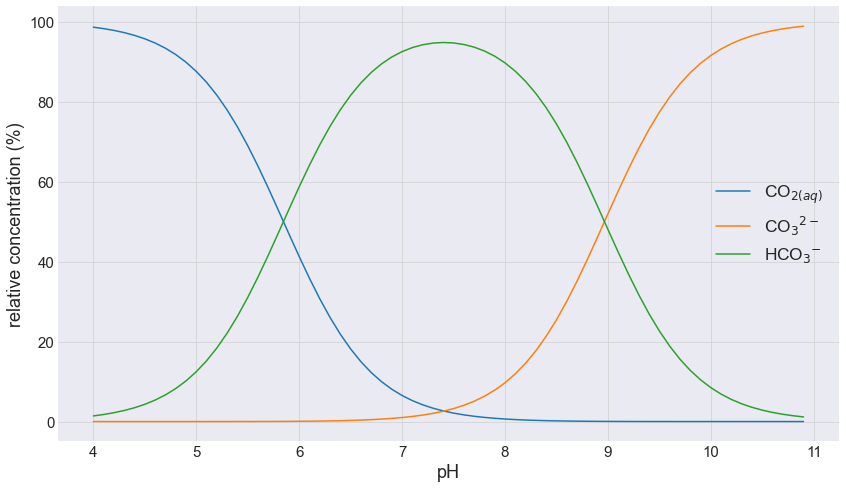

In [4]:
pH = np.arange(4,11,.1)
HCO3_c = (HCO_3/DIC)*100
CO3_c = (CO_3/DIC)*100
CO2_c = (CO2/DIC)*100

plt.figure(figsize=(14,8))
plt.plot(pH,CO2_c, label='CO$_{2(aq)}$')
plt.plot(pH,CO3_c, label='CO$_{3}$$^{2-}$')
plt.plot(pH,HCO3_c, label='HCO$_{3}$$^{-}$')
# plt.plot([5.847,5.847],[0,100],label='pK1')
# plt.plot([8.966,8.966],[0,100],label='pK2')

plt.xlabel('pH',fontsize=18)
plt.ylabel('relative concentration (%)',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='lightgrey')
plt.legend(loc='best',fontsize='xx-large',frameon=False)

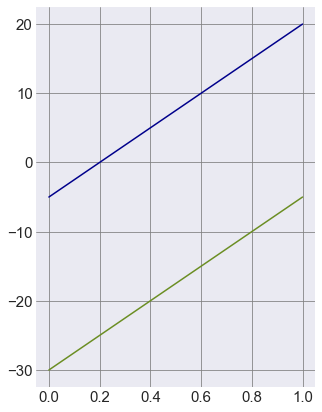

In [6]:
ycarb=(-5,20)
yorg=(-30,-5)
x=(0,1)
plt.figure(figsize=(5,7))
plt.plot(x,ycarb,color='darkblue',label='$\deltacarb')
plt.plot(x,yorg,color='olivedrab',label='$\deltaorg')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='grey')
plt.savefig('classic_carb_plot.png')